# Intro
This is a demo for progress made towards theorem proving in `Catlab.jl`

In [1]:
# Initialization
include("/Users/ksb/Catlab.jl/test/atp/ATP.jl"); # Where the wiring diagrams are defined
using Catlab.CategoricalAlgebra
using Catlab.Graphics

function show_diagram(d::WiringDiagram)
  to_graphviz(d, orientation=LeftToRight, labels=true)
end;


# Monoids
Generators for a theory are given by `Box` types. They have a symbol and a fixed number of inputs and outputs.

In [2]:
mmul     = Box(:mul, Two, One);
e        = Box(:e, Zero, One);
Σ_monoid = Set([mmul, e]);

We make terms with string diagrams, using generators and special commutative Frobenius algebra generators (ϵ, η, δ, μ - represented as boxes without a label). For example, `(e*x)*(x*e)`:

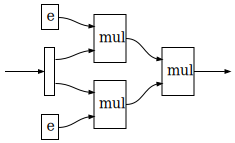

In [3]:
show_diagram(idxxid)

We can represent rewrite rules as pairs of terms. E.g. the left identity rule.

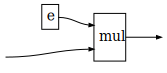

In [4]:
show_diagram(leftid[1])

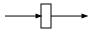

In [5]:
show_diagram(leftid[2])

The rule gets applied to a term by substituting the left or right pattern (via DPO rewriting) with a branching term that includes both sides of the equation.

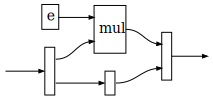

In [6]:
merge_leftid = branch(leftid...)[1]
show_diagram(merge_leftid)

We can convert string diagrams to instances of a C-Set whose models are structured cospans of hypergraphs (with a fixed signature of hyperedges). In this representation, connected components are condensed to a single vertex. (The `cospan_to_wd` function is used to convert back from the C-Set representation to a wiring diagram for visualization). 

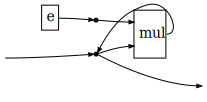

In [7]:
show_diagram(cospan_to_wd(wd_to_cospan(merge_leftid, Σ_monoid)[2]))

Let's prove a monoid theorem. We know the `(e*x)*(x*e)` term above is equivalent to `x*x`, shown below:

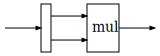

In [8]:
show_diagram(xx)

To prove these are equal, we apply the left and right identity rules to `(e*x)*(x*e)`:

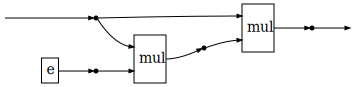

In [9]:
include("/Users/ksb/Catlab.jl/src/atp/ATP.jl"); # Where the wiring diagrams are defined

idxxid_sc = wd_to_cospan(idxxid, Σ_monoid)[2] # convert to C-set for structured cospans
applied_left_rw = apply_eq(idxxid_sc, Σ_monoid, leftid, repl=true);
show_diagram(cospan_to_wd(applied_left_rw))

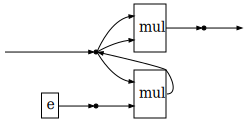

In [10]:
applied_both_rw = apply_eq(applied_left_rw, Σ_monoid, rightid, repl=false);
show_diagram(cospan_to_wd(applied_both_rw))

There was no homomorphism until both rewrites.

In [11]:
xx_sc = wd_to_cospan(xx, Σ_monoid)[2] 
@assert !is_homomorphic(xx_sc, idxxid_sc)
@assert !is_homomorphic(xx_sc, applied_left_rw)
@assert  is_homomorphic(xx_sc, applied_both_rw)

We can also apply the rewrites in the reverse direction to prove the other way. Furthermore we can naively apply all rewrite rules `n` times and check for homomorphisms as a basic automated theorem proving tactic .

In [12]:
# Prove opposite direction
applied_left_rw = apply_eq(xx_sc, Σ_monoid, leftid; forward=false)
applied_both_rw = apply_eq(applied_left_rw,  Σ_monoid, rightid; forward=false)
@assert is_homomorphic(idxxid_sc, applied_both_rw)

# Prove automatically given set of rules
result = prove(Σ_monoid, Set([leftid, rightid]), idxxid, xx, n=3, oriented=true)
@assert !(result === nothing)  # success

We can also automatically prove that the identity element of a monoid is unique.

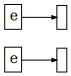

In [13]:
show_diagram(e_uniq_1)

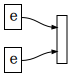

In [14]:
show_diagram(e_uniq_2)

In [15]:
result = prove(Σ_monoid, Set([leftid, rightid]), e_uniq_1, e_uniq_2, n=3, oriented=true)
@assert !(result === nothing)  # success

# Groups
To do interesting things with groups, we first need to prove that inverses are unique...

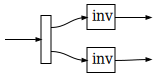

In [16]:
show_diagram(uniq_inv[1])

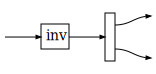

In [17]:
show_diagram(uniq_inv[2])

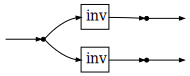

In [18]:
ui = wd_to_cospan(uniq_inv[1], Σ_group)[2]
show_diagram(cospan_to_wd(ui))

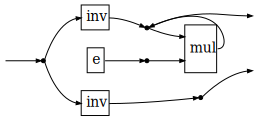

In [19]:
ui2 = apply_eq(ui, Σ_group, rightid; forward=false, repl=true, partial=[1=>2])
show_diagram(cospan_to_wd(ui2)) # replace b with b*e

In [20]:
include("/Users/ksb/Catlab.jl/src/atp/ATP.jl"); # Where the wiring diagrams are defined
ui3 = 

LoadError: syntax: incomplete: premature end of input

... that `a*x=b` has the unique solution `x=a⁻¹*b` ...

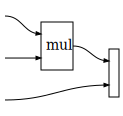

In [21]:
show_diagram(gdiv[1])

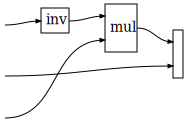

In [22]:
show_diagram(gdiv[2])

... and that we can left-cancel.

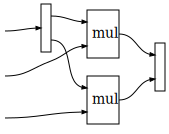

In [23]:
show_diagram(leftcancel[1])

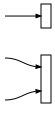

In [24]:
show_diagram(leftcancel[2])

# Dihedral groups
There are two typical ways to present dihedral groups, which are generated by elements `r` and `s` with order `n` and `2`, respectively. Let `n=3`.

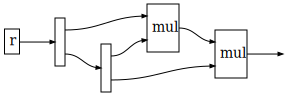

In [25]:
show_diagram(r_order_3[1]) # r_order_3[2] is just the group unit element, e

There is one more axiom, typically stated as `srs⁻¹=r⁻¹` or `(sr)²=1`. If we can show these two imply each other, we'll have shown the corresponding presentations are equal. 

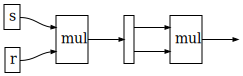

In [26]:
show_diagram(sr2) # an axiom declares this as equivalent to group unit element, e

We can prove one direction by the following chain: `(sr)² = srsr = (srs⁻¹)r = (r⁻¹)r = 1`. We benefit from knowing `s=s⁻¹`, which can be proven by left cancellation applied to `s*s=s*s⁻¹` (this is relatively close to our axioms).

To do: prove the group axioms, then this dihedral group theorem.